In [110]:
import numpy
import sklearn.cross_validation
import sklearn.datasets
import sklearn.linear_model
import sklearn.metrics
import sklearn.tree

from matplotlib import pyplot
%matplotlib inline

In [85]:
boston = sklearn.datasets.load_boston()
X, y = boston.data, boston.target
X_len = X.shape[0]
X_train, X_test = X[:-X_len // 4], X[-X_len // 4:]
y_train, y_test = y[:-X_len // 4], y[-X_len // 4:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [63]:
def gbm_predict(X, estimators, coefs):
    return numpy.sum(coefs * numpy.array(list(estimator.predict(X) for estimator in estimators)).T, axis=1)

In [92]:
def gbm_train(X, y, coefs, max_depth=5):
    estimators = []
    for _ in coefs:
        s = y - gbm_predict(X, estimators, coefs[:len(estimators)]) if estimators else y
        estimators.append(sklearn.tree.DecisionTreeRegressor(max_depth=max_depth, random_state=42).fit(X, s))
    return estimators

In [93]:
coefs = 0.9 * numpy.ones(50)
estimators = gbm_train(X_train, y_train, coefs)
rmse = numpy.sqrt(sklearn.metrics.mean_squared_error(y_test, gbm_predict(X_test, estimators, coefs)))
open("2-1.txt", "wt").write(str(rmse))
print(rmse)

5.47665097417


In [91]:
coefs = numpy.array([0.9 / (1 + i) for i in range(50)])
estimators = gbm_train(X_train, y_train, coefs)
rmse = numpy.sqrt(sklearn.metrics.mean_squared_error(y_test, gbm_predict(X_test, estimators, coefs)))
open("2-2.txt", "wt").write(str(rmse))
print(rmse)

4.81089328026


In [99]:
def estimate(n_iter, max_depth):
    coefs = numpy.array([0.9 / (1 + i) for i in range(n_iter)])
    estimators = gbm_train(X_train, y_train, coefs, max_depth=max_depth)
    return numpy.sqrt(sklearn.metrics.mean_squared_error(y_test, gbm_predict(X_test, estimators, coefs)))

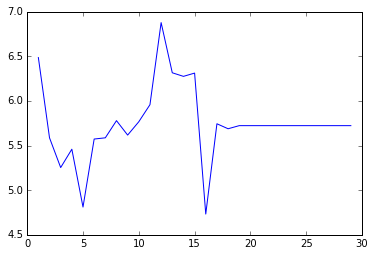

In [103]:
depths = list(range(1, 30))
pyplot.plot(depths, [estimate(50, depth) for depth in depths])
pyplot.show()

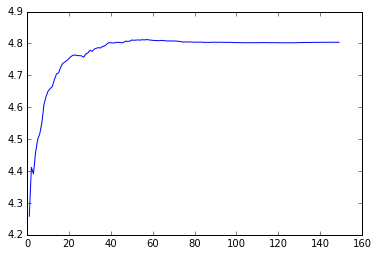

In [106]:
n_iters = list(range(1, 150))
pyplot.plot(n_iters, [estimate(n_iter, 5) for n_iter in n_iters])
pyplot.show()

In [111]:
open("2-3.txt", "wt").write("2 3")

3

In [113]:
y_predict = sklearn.linear_model.LinearRegression().fit(X_train, y_train).predict(X_test)
rmse = numpy.sqrt(sklearn.metrics.mean_squared_error(y_test, y_predict))
open("2-4.txt", "wt").write(str(rmse))
print(rmse)

8.27046803494
